# Predicting Customer Churn

I developed a model for predicting customer churn at a fictitious wireless telecom company and use insights from the model to develop an incentive plan for enticing would-be churners to remain with company.The data are a scaled down version of the full database generously donated by an anonymous wireless telephone company. 

There are still 7043 customers in the database, and 20 potential predictors. Candidates can use whatever method they wish to develop their machine learning model. 

The data are available in one data file with 7043 rows that combines the calibration and validation customers. 
“calibration” database consisting of 4000 customers and a “validation” database consisting of 3043 customers.

Each database contained (1) a “churn” variable signifying whether the customer had left the company two months after observation, and (2) a set of 20 potential predictor variables that could be used in a predictive churn model. Following usual model development procedures, the model is estimated on the calibration data and tested on the validation data. 

I am provided with the Data such as: CustomerID, Gender, Senior Citizen, Partner, Dependent, Tenure, Phone Service, Internet Services, Multiple Services, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn.

<<-- got the sample dataset from kaggle.com -->>

### Importing the data

In [2]:
# use these links to do so:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
data = pd.read_csv(r"D:\INSAID\Churn.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Understanding the data

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Here I am removing customerID from the Dataset
data = data.drop("customerID", axis = 1)

In [7]:
# checking for the NaN values
data[data.iloc[:,:] == " "] = np.NaN

In [8]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we can see that there are total of 11 Nan / Missing Values present. So inorder to move forward with our modeling, we have to get rid of these missing values. 

In [9]:
data = data.fillna(-1)

In [10]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So, finally we get rid of the missing values.

### Data Manipulation

In [11]:
data_c = data.columns
print(data_c)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
label = preprocessing.LabelEncoder()
for i in data_c:
    data[i] = label.fit_transform(data[i])

Encode target labels with value between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.
Label Encoder is used to transform non-numerical labels to numerical labels.

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,75,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,537,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,675,1


In [14]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X = data.iloc[:, 0:-1] is used to get all the values except last value in the column.
y = data.iloc[:, -1] is used to get all the values of rows only.

In [15]:
print(X.shape)

(7043, 19)


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k = 7).fit(X, y)
X_new = SelectKBest(score_func = chi2, k = 7).fit_transform(X, y)
print(X_new)
print(X_new.shape)

[[   1    0    2 ...    0  142   75]
 [  34    2    0 ...    1  498 3625]
 [   2    2    2 ...    0  436  537]
 ...
 [  11    2    0 ...    0  137 1266]
 [   4    0    0 ...    0  795 1158]
 [  66    2    0 ...    2 1388 6151]]
(7043, 7)


from sklearn.feature_selection import SelectKBest: selects features having highest k scores. 
from sklearn.feature_selection import chi2: This score can be used to select the non-negative features with the highest values                                                for the test chi-squared statistic from X, which must contain only non-negative                                                  features such as booleans or frequencies. 
fit(X, y): Run score function on (X, y) and get the appropriate features.
fit_transform(X, y): fit_to data and the transform / reduce X to the selected features.


In [17]:
print(X_new[0:15, :])

[[   1    0    2    0    0  142   75]
 [  34    2    0    0    1  498 3625]
 [   2    2    2    0    0  436  537]
 [  45    2    0    2    1  266 3571]
 [   2    0    0    0    0  729  675]
 [   8    0    0    0    0 1274 2174]
 [  22    0    2    0    0 1075 3674]
 [  10    2    0    0    0  140 1146]
 [  28    0    0    2    0 1371 4385]
 [  62    2    2    0    1  482 4632]
 [  13    2    0    0    0  375 1776]
 [  16    1    1    1    2    8 1214]
 [  58    0    0    0    1 1288 5689]
 [  49    0    2    0    0 1349 5422]
 [  25    2    0    2    0 1385 4179]]


In [18]:
np.set_printoptions(precision = 3, suppress = True)
print(test.scores_)

[     0.259    134.352     82.412    133.036  16278.924      0.097
      9.747      9.821    551.612    230.087    191.303    523.304
      7.49       8.235   1115.78     105.681     58.492  79452.351
 450421.67 ]


np.set_printoptions(precision = 3, suppress = True): sets the print options for the features. These options determine the way floating point numbers, arrays and other NumPy objects are displayed.

precision: is the number of digits to be fixed after the decimals.
suppress: If True, always print floating point numbers using fixed point notation. If False, then scientific notation is used when absolute value of the smallest number is < 1e-4 or the ratio of the maximum absolute value to the minimum is > 1e3.

scores_: Scores of features containing a single array with scores.

In [19]:
from sklearn.preprocessing import StandardScaler

z = ['Partner','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','TechSupport', 'StreamingTV', 'StreamingMovies','PaymentMethod', 'MonthlyCharges', 'TotalCharges']

w = data.loc[:, z]
std = StandardScaler()
X = std.fit_transform(X)
w = std.fit_transform(w)
print(X)
#print(w)

[[-1.01  -0.44   1.035 ...  0.399 -1.132 -1.554]
 [ 0.991 -0.44  -0.967 ...  1.335 -0.388  0.271]
 [ 0.991 -0.44  -0.967 ...  1.335 -0.517 -1.316]
 ...
 [-1.01  -0.44   1.035 ...  0.399 -1.142 -0.941]
 [ 0.991  2.273  1.035 ...  1.335  0.233 -0.997]
 [ 0.991 -0.44  -0.967 ... -1.474  1.472  1.57 ]]


from sklearn.preprocessing import StandardScaler: Standardize features by removing the mean and scaling to unit variance.
z = (x - u) / s is the main formula used in the standard scaler formula, where u is the mean of the training samples or zero if with mean = False, and s is the standard deviation of the training samples or one if with std = False.

fit_transform: Compute the mean and std to be used for later scaling, then transform it.

### Data Visualization

In [20]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Here we count the no of counts of churn in the dataset. 0 means False & 1 means True.

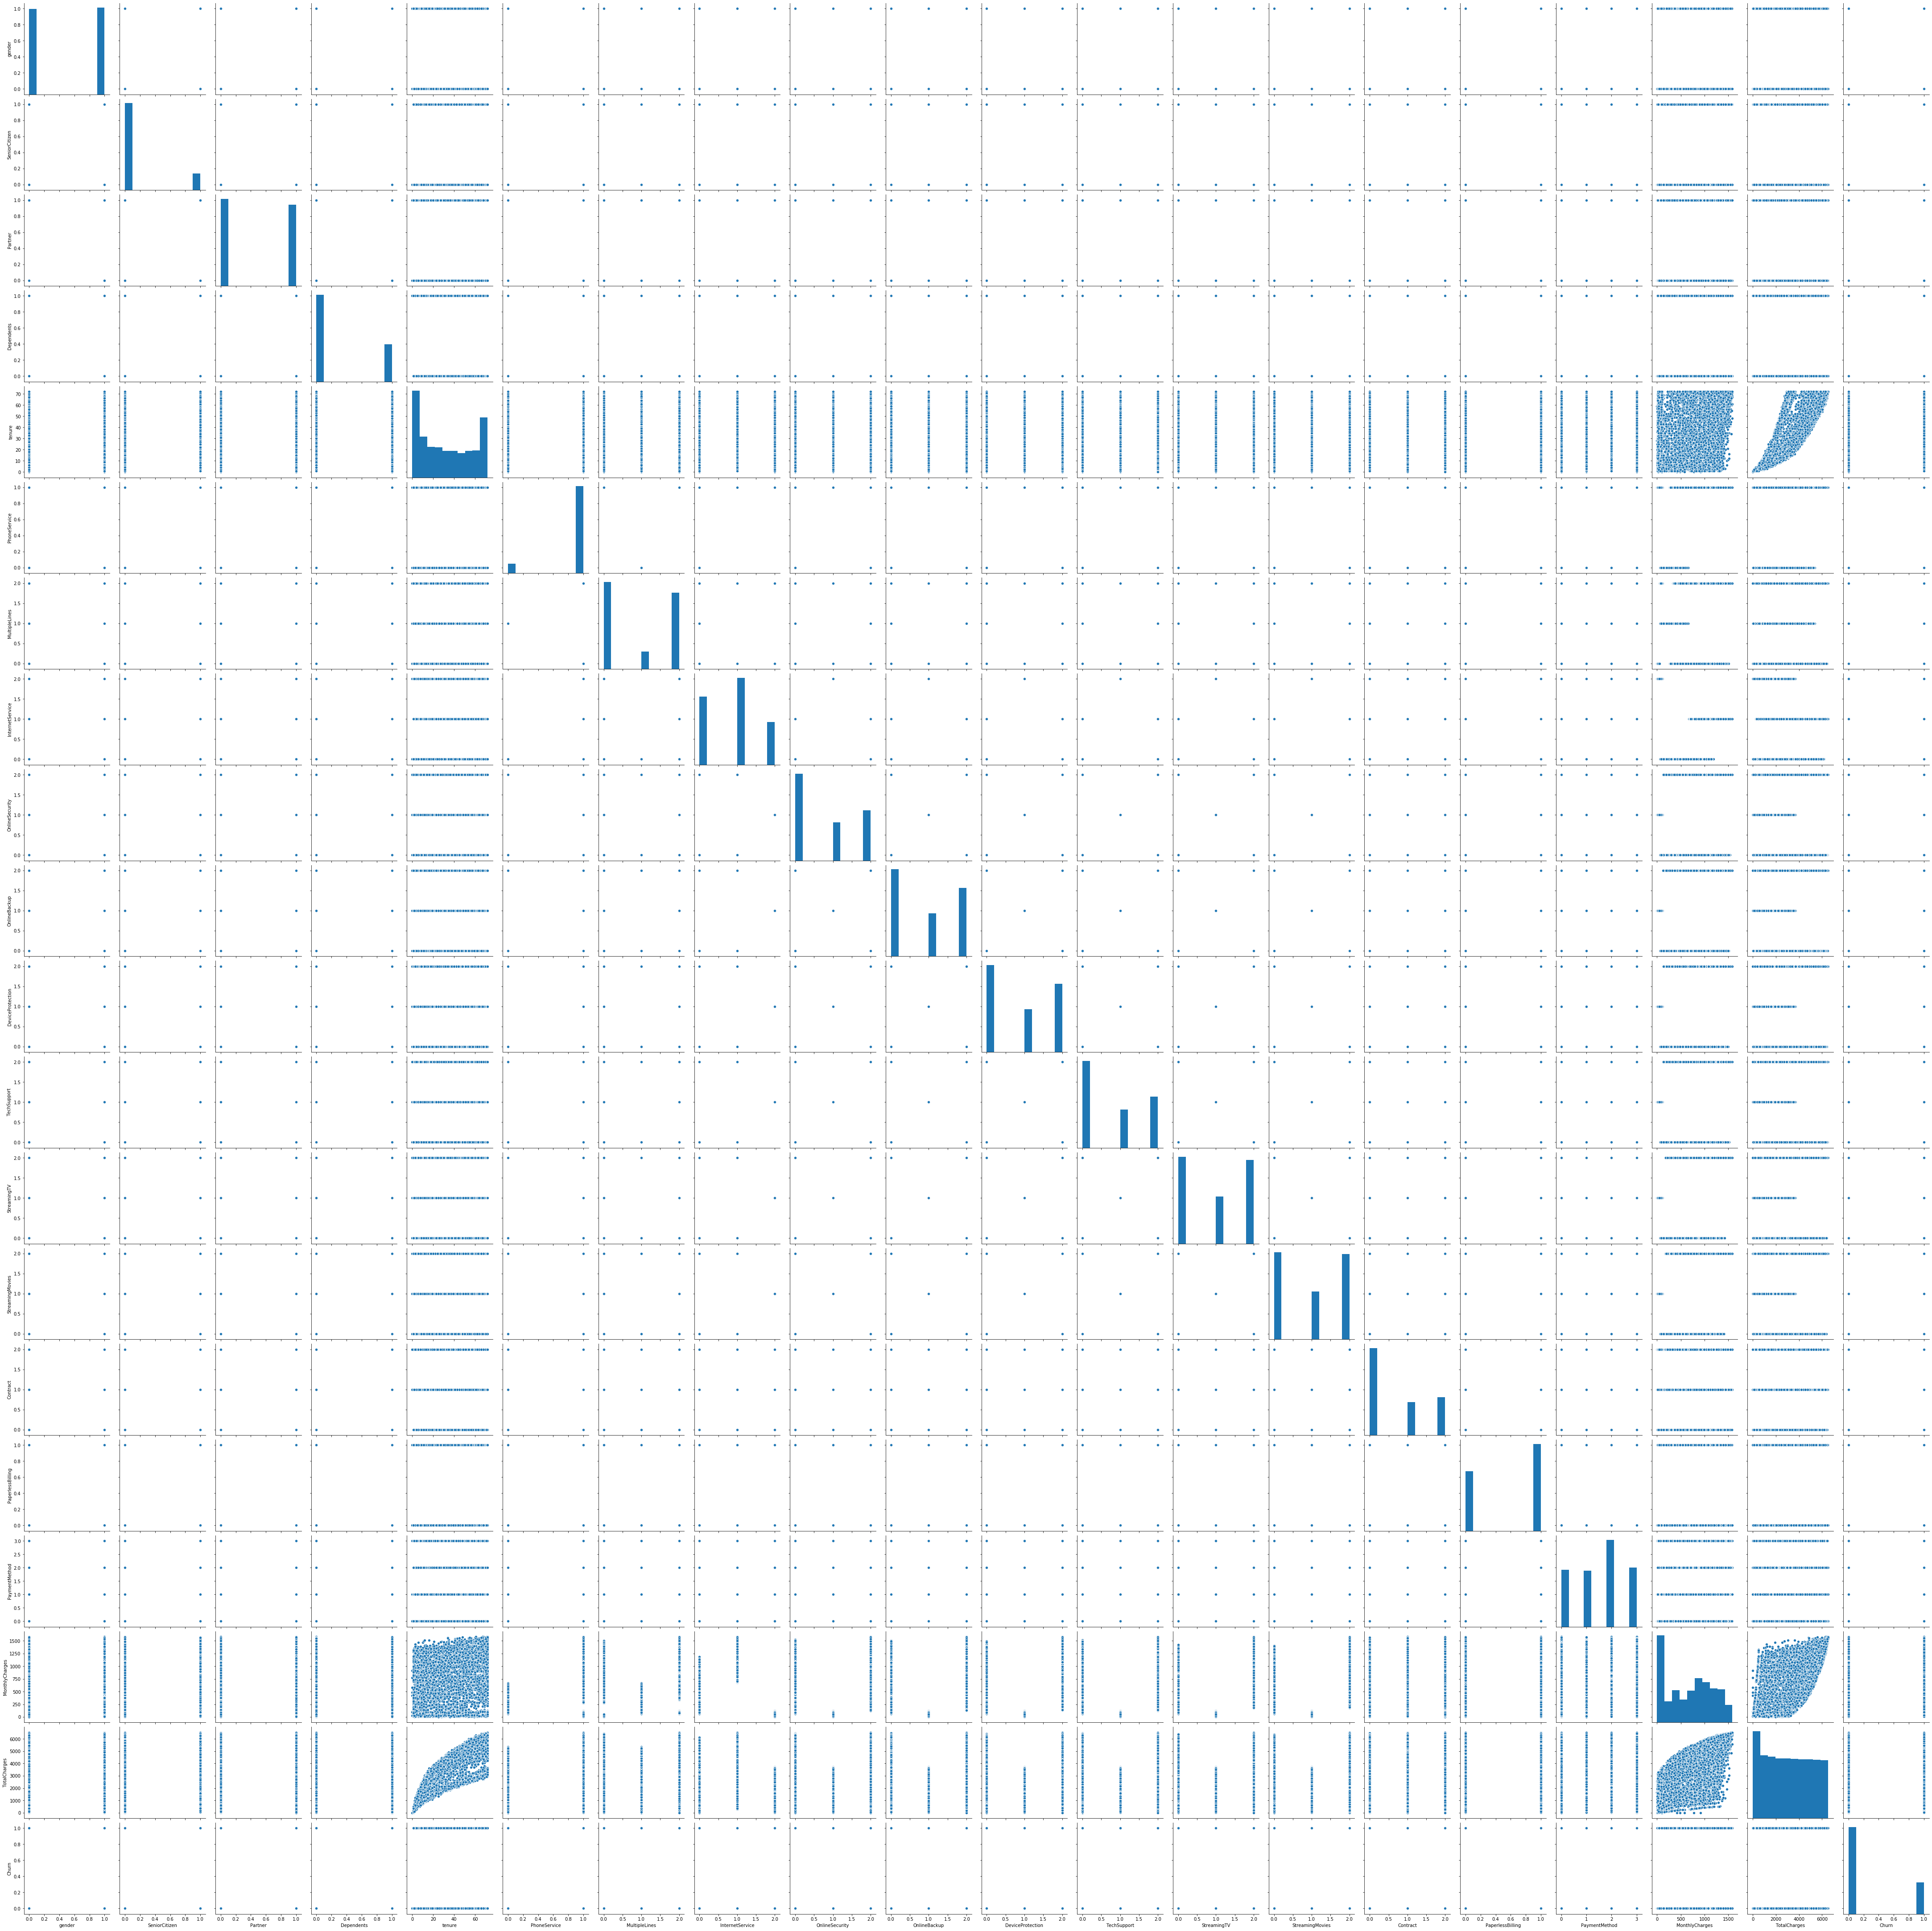

In [21]:
sb.pairplot(data, height = 3)

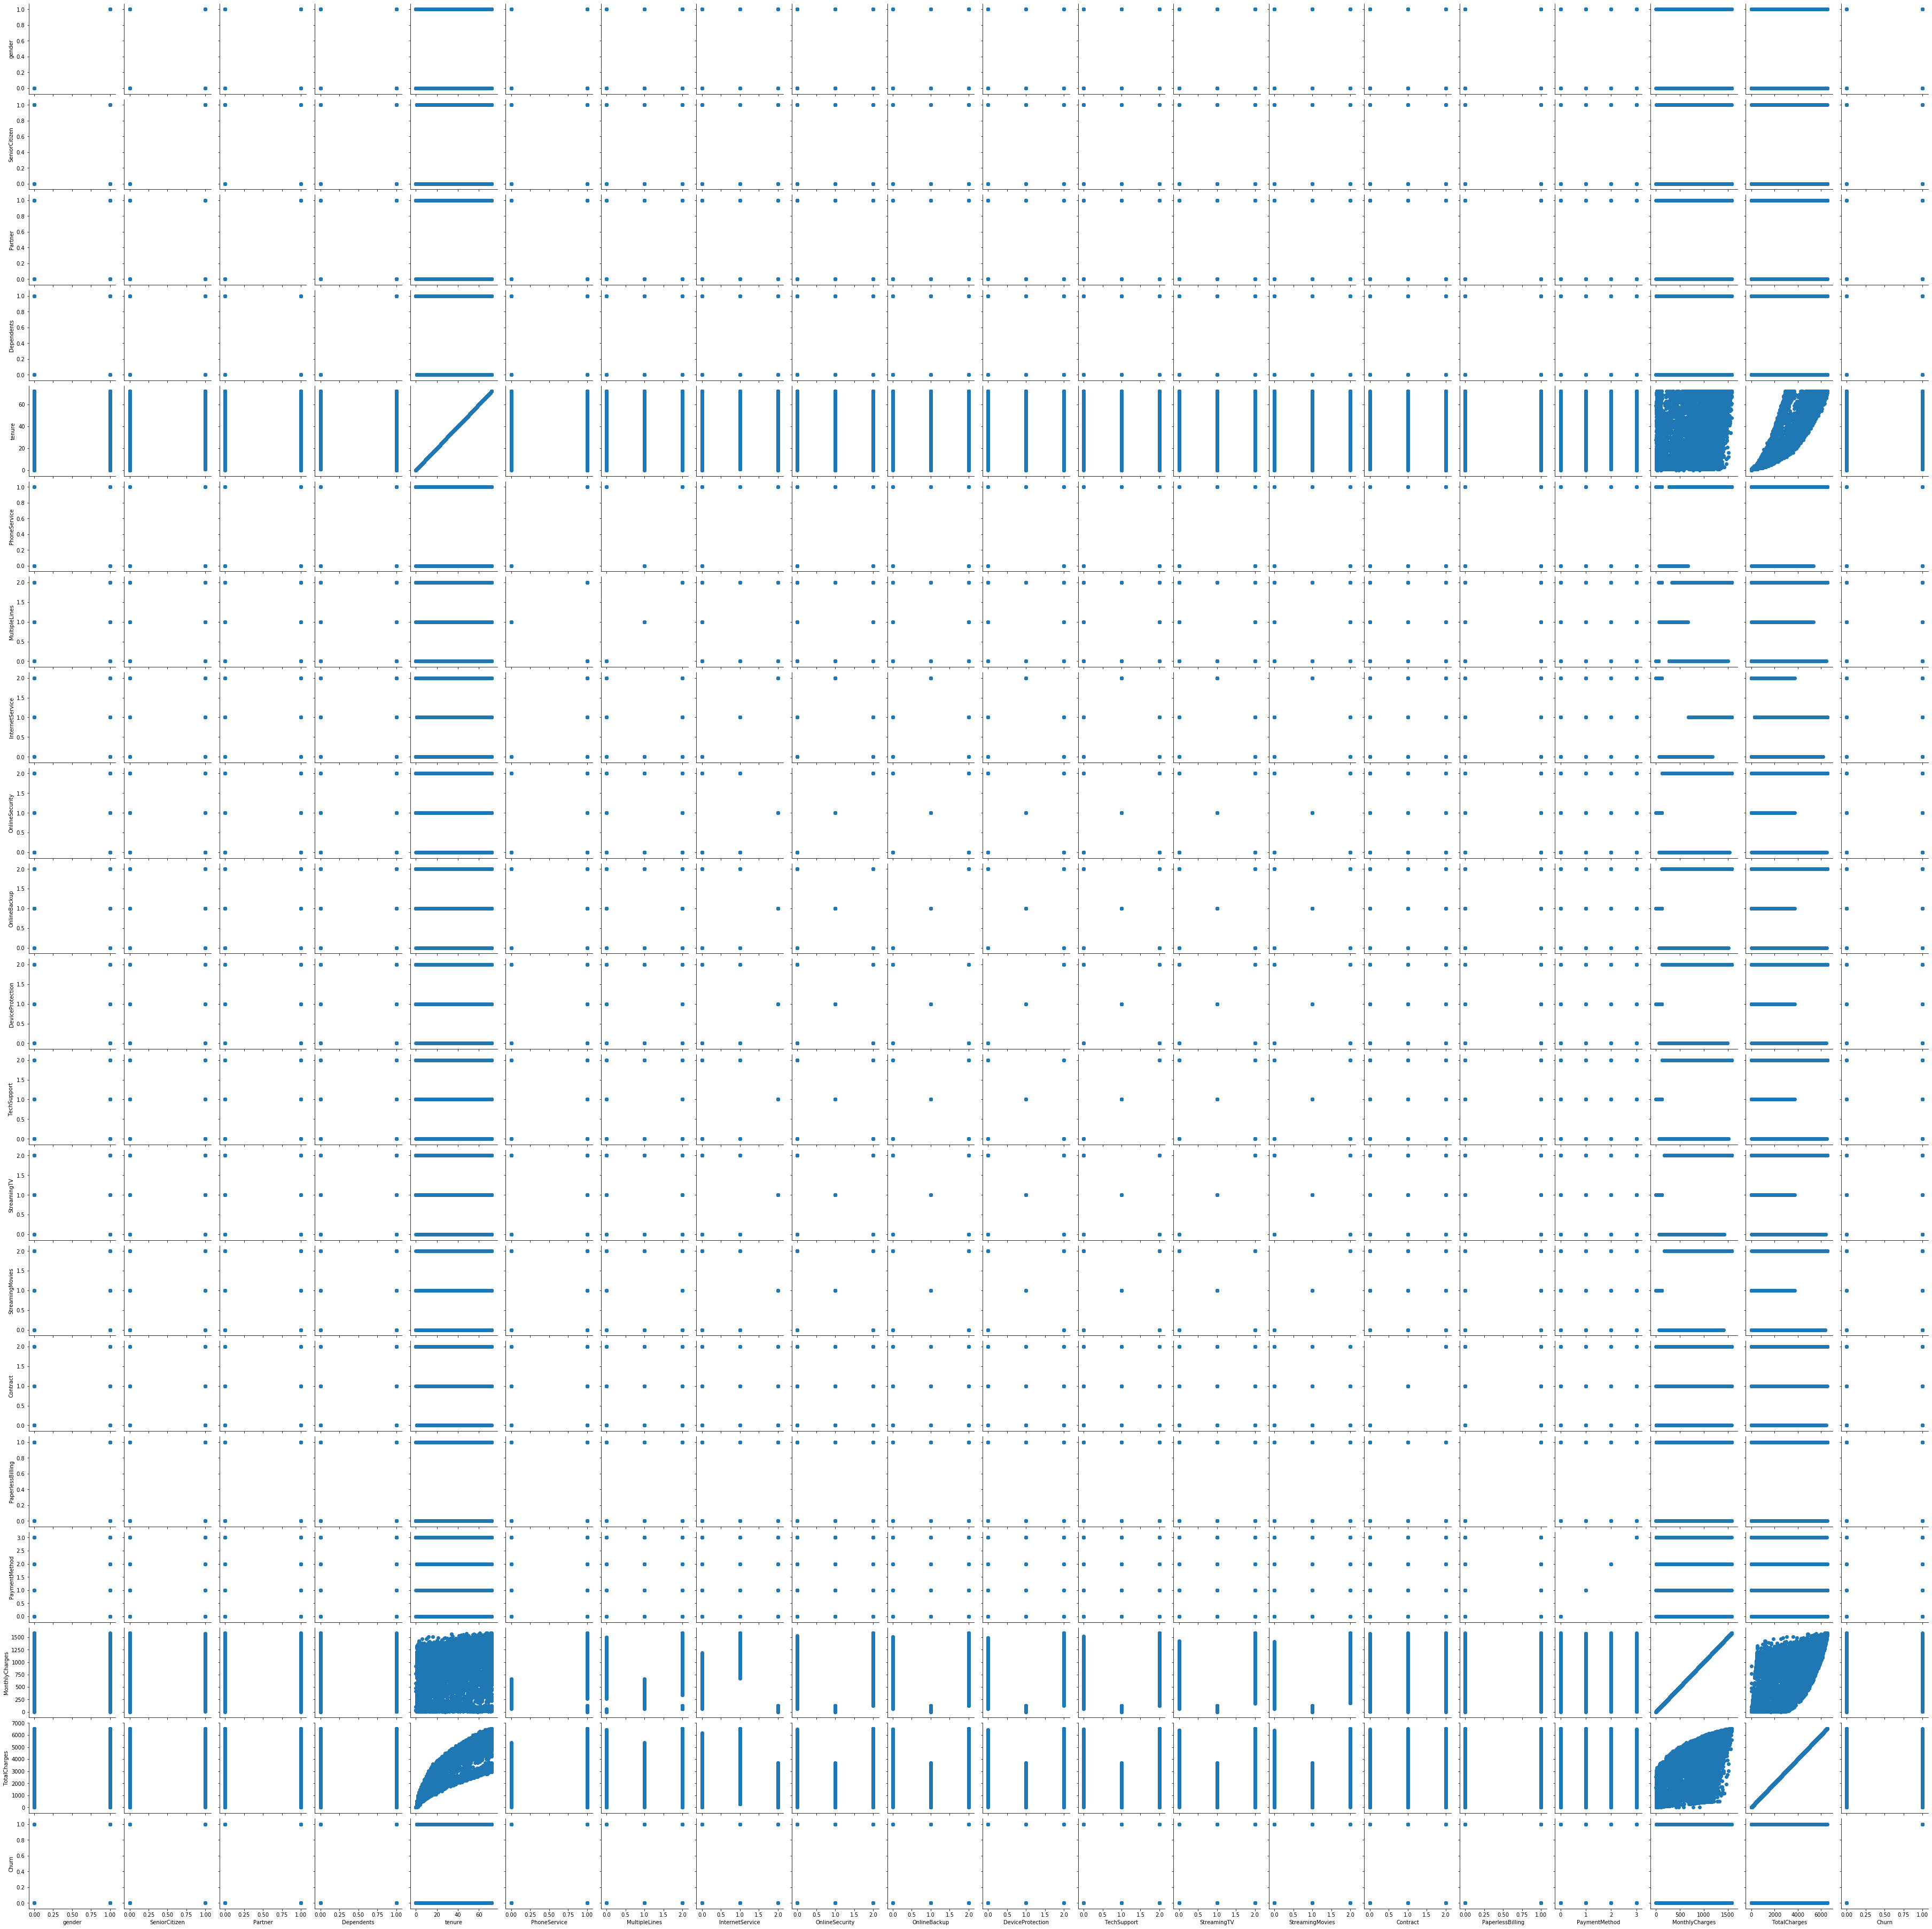

In [22]:
p = sb.PairGrid(data)
p = p.map(plt.scatter)

Here for the data visualization, I have used two types of methods:
1. Pairplot: Here we can see that I have plotted the map between each row and column of the dataset and got various         visualization as well as information about each other. for eg- if we compare tenure vs MonthlyCharges as well as Monthlycharges vs Totalcharges, it is very high correlated to each other.

2. Pair Grid: It is used to plot pairwise relationships between data. It is also somewhat same to the pairplot method used   above. 

### Implement Machine Learning Models

1. LOGISTIC REGRESSION

In [23]:
f1 = []
acc = []
a = 200
from sklearn.metrics import f1_score
for i in range(a):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    logistic = LogisticRegression(random_state = 0, solver = "liblinear")
    logistic.fit(X_train, y_train)
    lpred = logistic.predict(X_test)
    f1.append(f1_score(y_test, lpred, average = "weighted"))
    acc.append(accuracy_score(y_test, lpred))
    print("Maximum F1 Score", np.max(f1))
    print("Minimum F1 Score", np.min(f1))
    print("Average F1 Score", np.mean(f1))
    print("Average Accuracy",np.mean(acc))
    print("Maximum Accuracy",np.max(acc))
    print("Minimum Accuracy",np.min(acc))

Maximum F1 Score 0.7867012089497548
Minimum F1 Score 0.7867012089497548
Average F1 Score 0.7867012089497548
Average Accuracy 0.7963094393186657
Maximum Accuracy 0.7963094393186657
Minimum Accuracy 0.7963094393186657
Maximum F1 Score 0.7979639917556428
Minimum F1 Score 0.7867012089497548
Average F1 Score 0.7923326003526988
Average Accuracy 0.8019872249822569
Maximum Accuracy 0.8076650106458482
Minimum Accuracy 0.7963094393186657
Maximum F1 Score 0.7979639917556428
Minimum F1 Score 0.7867012089497548
Average F1 Score 0.7925815941432033
Average Accuracy 0.8018689377809322
Maximum Accuracy 0.8076650106458482
Minimum Accuracy 0.7963094393186657
Maximum F1 Score 0.7979639917556428
Minimum F1 Score 0.7867012089497548
Average F1 Score 0.7919892695248345
Average Accuracy 0.8011887863733145
Maximum Accuracy 0.8076650106458482
Minimum Accuracy 0.7963094393186657
Maximum F1 Score 0.7993886504940246
Minimum F1 Score 0.7867012089497548
Average F1 Score 0.7934691457186724
Average Accuracy 0.802484031

2. RANDOM FOREST

In [24]:
a = 200
for i in range(a):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    fpred = forest.predict(X_test)
    f1.append(f1_score(y_test, fpred, average = "weighted"))
    acc.append(accuracy_score(y_test, fpred))
    print("Maximum F1 Score", np.max(f1))
    print("Minimum F1 Score", np.min(f1))
    print("Average F1 Score", np.mean(f1))
    print("Average Accuracy",np.mean(acc))
    print("Maximum Accuracy",np.max(acc))
    print("Minimum Accuracy",np.min(acc))   

Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.7794192453475653
Average F1 Score 0.7959344725262082
Average Accuracy 0.8044165263109576
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.7892122072391767
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.7794192453475653
Average F1 Score 0.795869225528969
Average Accuracy 0.8043640950326403
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.7892122072391767
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.7724597773378526
Average F1 Score 0.795753908050195
Average Accuracy 0.804249249196754
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.7810503903477644
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.7724597773378526
Average F1 Score 0.7956487128688302
Average Accuracy 0.8041529244771008
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.7810503903477644
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.7701198042582504
Average F1 Score 0.7955241816073154
Average Accuracy 0.804040229188

3. SUPPORT VECTOR MACHINE

In [25]:
a = 200
for i in range(a):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    s = SVC(kernel = "linear")
    s.fit(X_train, y_train)
    spred = s.predict(X_test)
    f1.append(f1_score(y_test, fpred, average = "weighted"))
    acc.append(accuracy_score(y_test, fpred))
    print("Maximum F1 Score", np.max(f1))
    print("Minimum F1 Score", np.min(f1))
    print("Average F1 Score", np.mean(f1))
    print("Average Accuracy",np.mean(acc))
    print("Maximum Accuracy",np.max(acc))
    print("Minimum Accuracy",np.min(acc)) 

Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.612034408019956
Average F1 Score 0.7879076715727388
Average Accuracy 0.7971315501169007
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.6256210078069553
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.612034408019956
Average F1 Score 0.7874888293322928
Average Accuracy 0.7967243272636109
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.6256210078069553
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.612034408019956
Average F1 Score 0.7870626782461686
Average Accuracy 0.7963138420680947
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.6256210078069553
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.612034408019956
Average F1 Score 0.7866510596453778
Average Accuracy 0.7959089024587342
Maximum Accuracy 0.8176011355571328
Minimum Accuracy 0.6256210078069553
Maximum F1 Score 0.8122493738645554
Minimum F1 Score 0.612034408019956
Average F1 Score 0.786294305757217
Average Accuracy 0.795557658439134

Here I used 3 types of Machine Learning Models ie:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine

Calculated the Maximum, Minimum as well as Average Value of F1 score and Accuracy score which is basically used Model Evaluation. 

### Model Evaluation

1. LOGISTIC REGRESSION

accuracy:   63.982
[[1637  438]
 [ 577  166]]


Text(26.5, 0.5, 'true values')

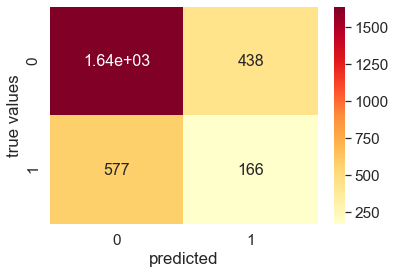

In [26]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, lpred)
print("accuracy:   %0.3f" % (score*100))
c_matrix = metrics.confusion_matrix(y_test, lpred, labels = [0,1])
print(c_matrix)
sb.set(font_scale = 1.4)
sb.heatmap(c_matrix, annot = True, annot_kws = {'size':16}, fmt = '.3g', cmap = 'YlOrRd')
plt.xlabel("predicted")
plt.ylabel("true values")

2. RANDOM FOREST

accuracy:   62.952
[[1618  457]
 [ 587  156]]


Text(26.5, 0.5, 'true values')

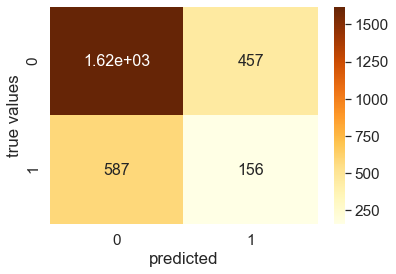

In [27]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, fpred)
print("accuracy:   %0.3f" % (score*100))
c_matrix = metrics.confusion_matrix(y_test, fpred, labels = [0,1])
print(c_matrix)
sb.set(font_scale = 1.4)
sb.heatmap(c_matrix, annot = True, annot_kws = {'size':16}, fmt = '.3g', cmap = 'YlOrBr')
plt.xlabel("predicted")
plt.ylabel("true values")

3. SUPPORT VECTOR MACHINE

accuracy:   80.518
[[1941  134]
 [ 415  328]]


Text(26.5, 0.5, 'true values')

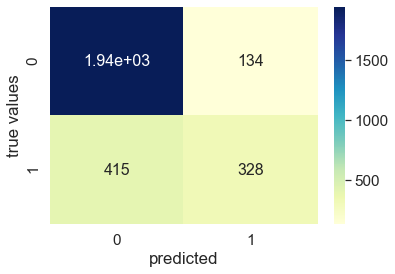

In [28]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, spred)
print("accuracy:   %0.3f" % (score*100))
c_matrix = metrics.confusion_matrix(y_test, spred, labels = [0,1])
print(c_matrix)
sb.set(font_scale = 1.4)
sb.heatmap(c_matrix, annot = True, annot_kws = {'size':16}, fmt = '.3g', cmap = 'YlGnBu')
plt.xlabel("predicted")
plt.ylabel("true values")

Here, We can see that by using SVM model, we get the maximum accuracy of about 79.74 % which is far better than remaining 2 models. We got about 63.5 % accuracy by using Random Forest model & 66.1 % accuracy by using Logistic Regression Model.

#### ROC CURVE & ROC ACCURACY SCORE 

In [29]:
from sklearn.metrics import roc_curve     # for Random Forest
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, fpred)
print('AUC for RF: %.3f' % auc)

AUC for RF: 0.495


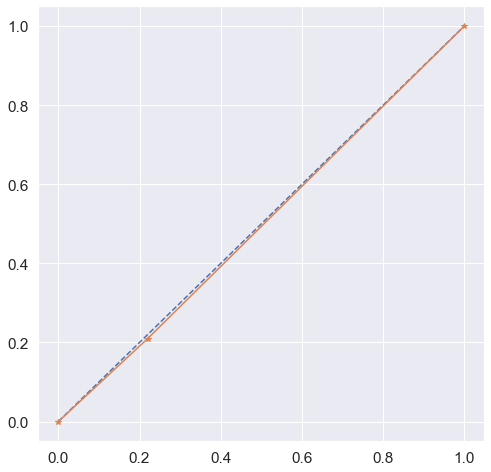

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, fpred)
plt.figure(figsize = (8, 8))

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='*')

plt.show()

In [31]:
auc = roc_auc_score(y_test, spred)  # for SVM
print('AUC for SVM: %.3f' % auc)

AUC for SVM: 0.688


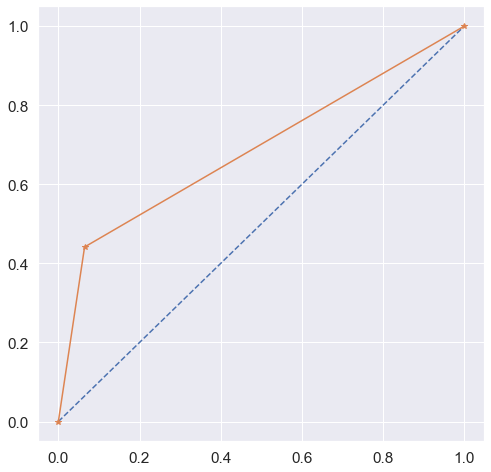

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, spred)
plt.figure(figsize = (8, 8))

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='*')

plt.show()

In [33]:
auc = roc_auc_score(y_test, lpred)   # for Logistic regression
print('AUC for LR: %.3f' % auc)

AUC for LR: 0.506


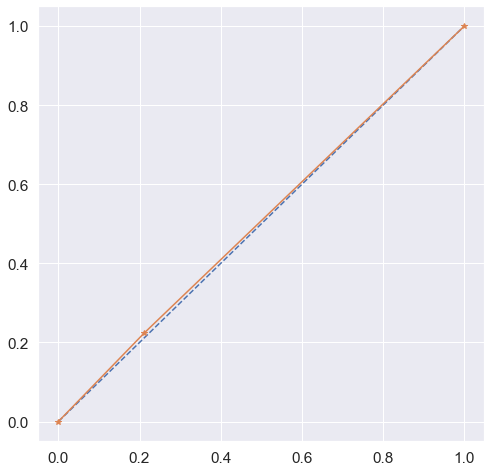

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, lpred)
plt.figure(figsize = (8, 8))

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='*')

plt.show()

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

We can see that for our 3 models, auc score is about:- 
1. Logistic Regression: 0.518 
2. Random Forest: 0.493
3. SVM: 0.677

### Final Conclusions

Therefore I have used 3 types of machine learning models to implement it as well as used ROC to find whether the performance of the model is good, bad or mediocre. 
SVM outperforms the other 2 by getting around 79.74 % of accuracy as well as auc score of about 0.677.
Accuracy of all 3 models can be furthered increased by improving and tuning the features.